In [8]:
import cv2
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt

# Preprocessing and detection

In [9]:
images = [cv2.imread('input/' + str(f) +  '.jpg') for f in range(1,4)] # Import images

print(len(images))

images = [cv2.resize(img, (0,0), fx=0.4, fy=0.4) for img in images] # Resize images

g = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images] # Convert to grayscale

g = [cv2.GaussianBlur(img, (9,9), 2) for img in g] # Apply Gaussian blur to reduce noise

3


# Part A

In [10]:
edges = [cv2.Canny(gr, 50, 150) for gr in g] # Use Canny edge detection for each image

kernel = np.ones((3,3), np.uint8) # Create a kernel for morphological operations
dilated = [cv2.dilate(edge, kernel, iterations=2) for edge in edges] # Dilate the edges to make them more visible
closed = [cv2.morphologyEx(dilate, cv2.MORPH_CLOSE, kernel, iterations=2) for dilate in dilated] # Close the edges to make them more solid

In [11]:
contours = [cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) for close in closed] # Find the contours in the images

# Filter the contours based on their circularity, size and perimeter
detected_contours = [[cnt for cnt in contour[0] if (perimeter := cv2.arcLength(cnt, True)) > 0 
                        and 0.7 < (circularity := 4 * np.pi * (cv2.contourArea(cnt) / (perimeter ** 2))) < 1.2
                        and (radius := np.sqrt(cv2.contourArea(cnt) / np.pi)) > 10] for contour in contours]

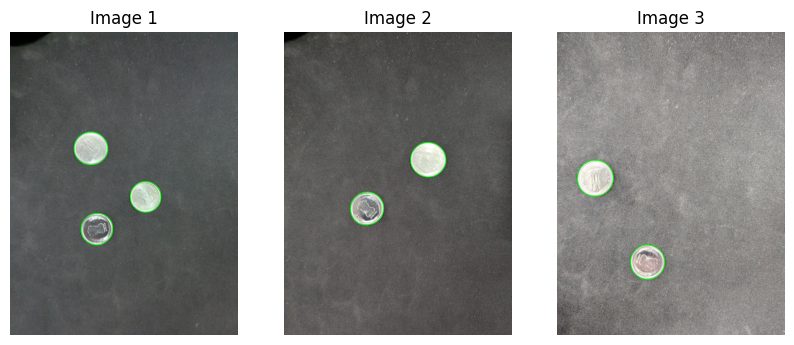

In [12]:
# Draw the contours on the original images
for i, img in enumerate(images):
    cv2.drawContours(img, detected_contours[i], -1, (0,255,0), 3)
    cv2.imwrite(f'output/{str(i+1)}.jpg', img)

# Display the images
plt.figure(figsize=(10, 10))
for j in range(len(images)):
    plt.subplot(1, len(images), j+1)
    plt.imshow(cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB))
    plt.title(f'Image {j+1}')
    plt.axis('off')
plt.show()

# Part B

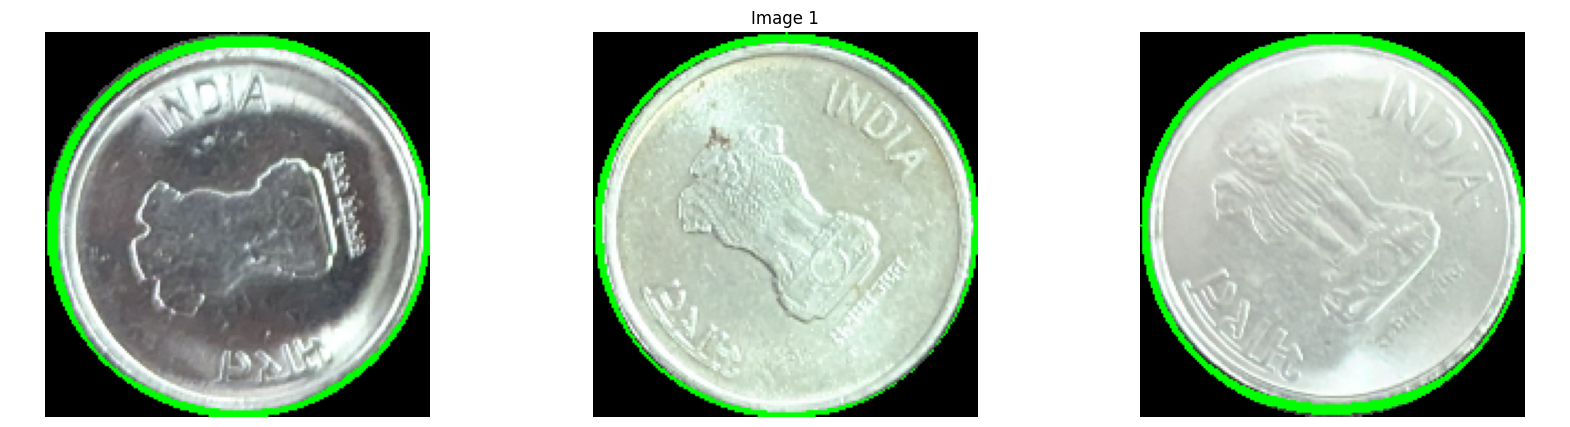

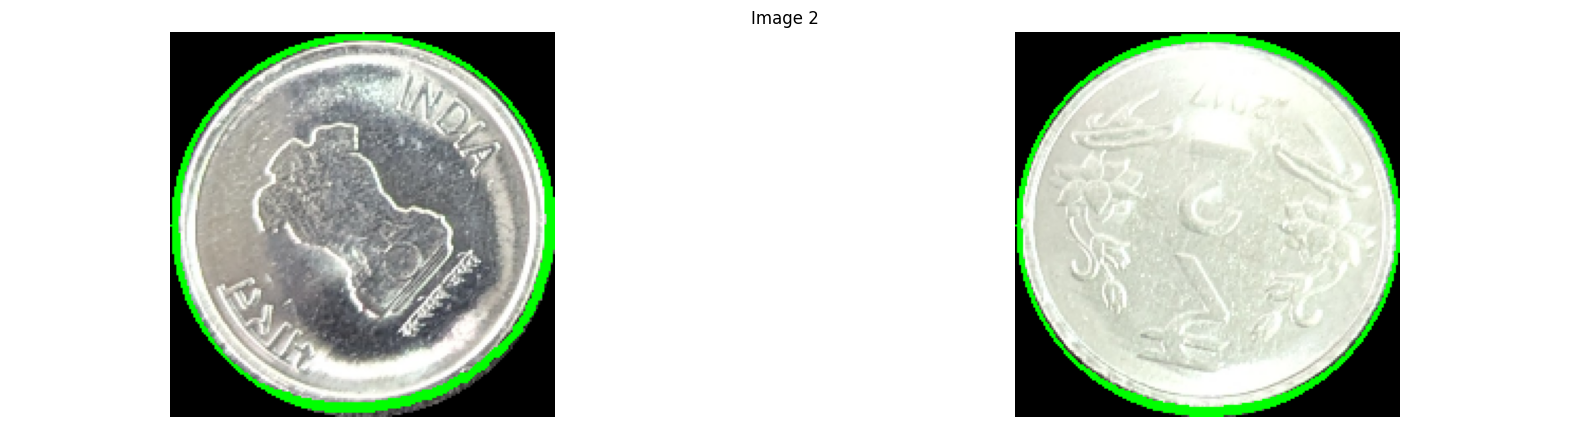

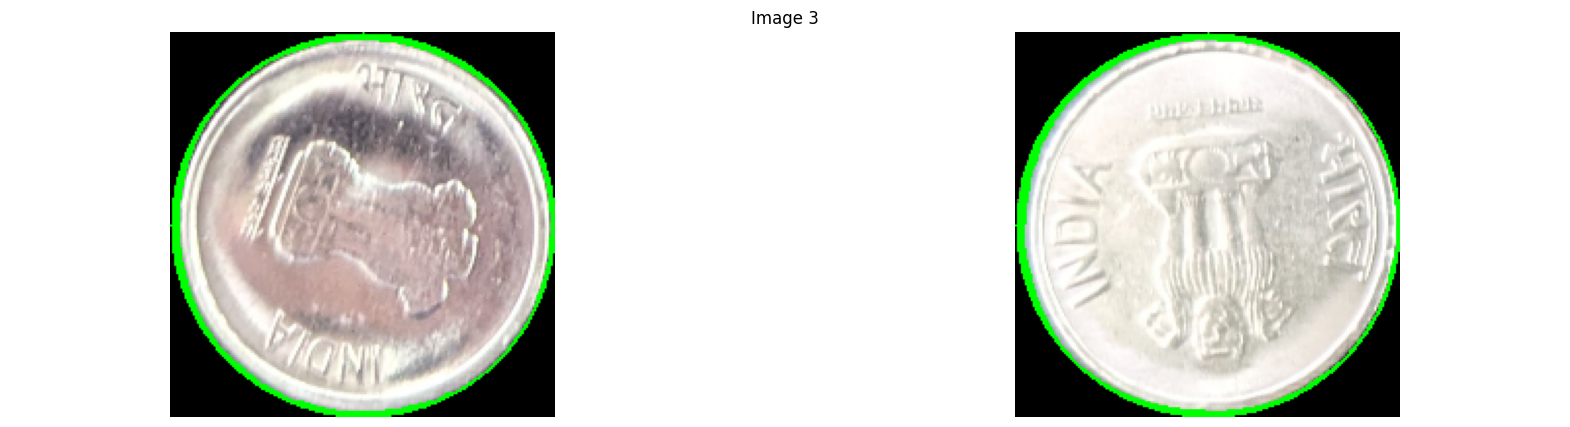

In [13]:
segmented_coins = []
counter = [] # Counter for the number of coins in each image

j = 0 # Image counter
count = 0 # Coin counter

for img, x in zip(images, detected_contours):
    j += 1 # Increment the image counter
    for i, cnt in enumerate(x):
        (x, y), radius = cv2.minEnclosingCircle(cnt) # Get the minimum enclosing circle of the contour
        center, radius = (int(x), int(y)), int(radius) # Get the center and radius of the circle
        mask = np.zeros_like(img, dtype=np.uint8)
        cv2.circle(mask, center, radius, (255, 255, 255), -1)
        
        # Ensure the coordinates are within the image boundaries
        y1, y2 = max(center[1] - radius, 0), min(center[1] + radius, img.shape[0])
        x1, x2 = max(center[0] - radius, 0), min(center[0] + radius, img.shape[1])
        
        coin_segment = cv2.bitwise_and(img, mask)[y1:y2, x1:x2] # Segment the coin from the image
        segmented_coins.append(coin_segment) # Append the segmented coin to the list
        
        cv2.imwrite(f'output/segmented_{str(j)}_{str(i+1)}.jpg', coin_segment) # Save the segmented coin
    
    # Display the segmented coins
    plt.figure(figsize=(20, 5))
    plt.title(f'Image {j}')
    plt.axis('off')
    for i, coin in enumerate(segmented_coins[count:]):
        plt.subplot(1, len(segmented_coins[count:]), i+1)
        plt.imshow(cv2.cvtColor(coin, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        # plt.title(f'Image {j} Coin {i+1}')
    plt.show()
    temp = count
    count += len(segmented_coins[count:])
    counter.append(count-temp if count-temp > 0 else count) # Append the number of coins in the image

# Part C

In [14]:
# this has automatically counted the number of coins from the previous part

for i,x in enumerate(counter):
    print(f'Image-{i+1} has {x} coins')

print()
print(f'Total number of coins in all images: {sum(counter)}')


Image-1 has 3 coins
Image-2 has 2 coins
Image-3 has 2 coins

Total number of coins in all images: 7
